## Grocery Shopping in London (Ontario) During COVID-19

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

from IPython.display import Image 
from IPython.core.display import HTML 

from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



__First collect the grocery stores in London (for safety reasons, the CLIENT_ID and CLIENT_SECRET are edited)__

In [2]:
CLIENT_ID = '****************************'
CLIENT_SECRET = '*****************************'

In [9]:
loc='London, ON'
LIMIT=40
Version='20200720'
categoryId='4bf58dd8d48988d118951735'

In [10]:
url='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&near={}&categoryId={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,Version,loc,categoryId,LIMIT)

In [11]:
results = requests.get(url).json()

In [12]:
venues = results['response']['venues']
dataframe = json_normalize(venues)

Some of the stores are not located in London, and we need to remove them first

In [13]:
df1=dataframe.drop(dataframe[dataframe['location.city'] != 'London'].index)

In [14]:
df1=df1.reset_index(drop=True)
df1

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",False,4b50d4d1f964a5202d3427e3,1030 Adelaide St N,CA,London,Canada,at Cheapside St.,"[1030 Adelaide St N (at Cheapside St.), London...","[{'label': 'display', 'lat': 43.00733418607895...",43.007334,-81.239668,N5Y 2M9,ON,Metro,v-1595602350
1,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",False,4b6df28ff964a5201d9e2ce3,1740 Richmond St N,CA,London,Canada,at Fanshawe Park Rd. E.,"[1740 Richmond St N (at Fanshawe Park Rd. E.),...","[{'label': 'display', 'lat': 43.028231, 'lng':...",43.028231,-81.282219,N5X 2S7,ON,Loblaws,v-1595602350
2,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",False,555669fc498eb932fa27697a,1415 Beaverbrook Ave,CA,London,Canada,NaN,"[1415 Beaverbrook Ave, London ON N6H 0J1, Canada]","[{'label': 'display', 'lat': 42.98962229915124...",42.989622,-81.297794,N6H 0J1,ON,Farm Boy,v-1595602350
3,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",False,4c7d69a6d598a09362cdc262,"1925 Dundas St E, West Argyle Mall",CA,London,Canada,at Clarke Rd.,"[1925 Dundas St E, West Argyle Mall (at Clarke...","[{'label': 'display', 'lat': 43.003134, 'lng':...",43.003134,-81.171855,N5V 1P7,ON,Adrian's No Frills,v-1595602350
4,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",False,5a6f18486336be322be74e40,960 Hamilton Rd,CA,London,Canada,NaN,"[960 Hamilton Rd, London ON N5W 1A3, Canada]","[{'label': 'display', 'lat': 42.978555, 'lng':...",42.978555,-81.192596,N5W 1A3,ON,Brent & Jennie's No Frills,v-1595602350
5,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",False,4b50ed9bf964a520143927e3,635 Southdale Rd E,CA,London,Canada,at Verulam St.,"[635 Southdale Rd E (at Verulam St.), London O...","[{'label': 'display', 'lat': 42.942813, 'lng':...",42.942813,-81.231161,N6E 3W6,ON,Cayle’s No Frills,v-1595602350
6,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",False,4be47aa2910020a146c6d114,599 Fanshawe Park Rd W,CA,London,Canada,at Wonderland Rd.,"[599 Fanshawe Park Rd W (at Wonderland Rd.), L...","[{'label': 'display', 'lat': 43.0201, 'lng': -...",43.020100,-81.309600,N6G 5B3,ON,Robert & Tracey's No Frills,v-1595602350
7,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",False,4d88bbc96daeb60c46a340e0,1298 Trafalgar St.,CA,London,Canada,at Highbury Ave. N.,"[1298 Trafalgar St. (at Highbury Ave. N.), Lon...","[{'label': 'display', 'lat': 42.98473157780361...",42.984732,-81.200038,N5Z 1H9,ON,FreshCo,v-1595602350
8,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",False,4b47b8fef964a520ea3b26e3,1595 Adelaide St N,CA,London,Canada,at Fanshawe Park Rd,"[1595 Adelaide St N (at Fanshawe Park Rd), Lon...","[{'label': 'display', 'lat': 43.036706, 'lng':...",43.036706,-81.257420,N5X 4E8,ON,Sobeys North London,v-1595602350
9,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",False,4b5cea27f964a520a24a29e3,1244 Commissioners Rd W,CA,London,Canada,Boler Rd.,"[1244 Commissioners Rd W (Boler Rd.), London O...","[{'label': 'display', 'lat': 42.95803213168525...",42.958032,-81.331756,N6K 1C7,ON,Metro,v-1595602350


And it is necessary to make refinement of the dataframe to list the infomration that is more useful

In [15]:
filtered_columns = ['name', 'categories'] + [col for col in df1.columns if col.startswith('location.')] + ['id']
df2 = df1.loc[:, filtered_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df2['categories'] = df2.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df2.columns = [column.split('.')[-1] for column in df2.columns]

In [16]:
df2.head()

,name,categories,address,cc,city,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Metro,Supermarket,1030 Adelaide St N,CA,London,Canada,at Cheapside St.,"[1030 Adelaide St N (at Cheapside St.), London...","[{'label': 'display', 'lat': 43.00733418607895...",43.007334,-81.239668,N5Y 2M9,ON,4b50d4d1f964a5202d3427e3
1,Loblaws,Grocery Store,1740 Richmond St N,CA,London,Canada,at Fanshawe Park Rd. E.,"[1740 Richmond St N (at Fanshawe Park Rd. E.),...","[{'label': 'display', 'lat': 43.028231, 'lng':...",43.028231,-81.282219,N5X 2S7,ON,4b6df28ff964a5201d9e2ce3
2,Farm Boy,Grocery Store,1415 Beaverbrook Ave,CA,London,Canada,NaN,"[1415 Beaverbrook Ave, London ON N6H 0J1, Canada]","[{'label': 'display', 'lat': 42.98962229915124...",42.989622,-81.297794,N6H 0J1,ON,555669fc498eb932fa27697a
3,Adrian's No Frills,Grocery Store,"1925 Dundas St E, West Argyle Mall",CA,London,Canada,at Clarke Rd.,"[1925 Dundas St E, West Argyle Mall (at Clarke...","[{'label': 'display', 'lat': 43.003134, 'lng':...",43.003134,-81.171855,N5V 1P7,ON,4c7d69a6d598a09362cdc262
4,Brent & Jennie's No Frills,Grocery Store,960 Hamilton Rd,CA,London,Canada,NaN,"[960 Hamilton Rd, London ON N5W 1A3, Canada]","[{'label': 'display', 'lat': 42.978555, 'lng':...",42.978555,-81.192596,N5W 1A3,ON,5a6f18486336be322be74e40


Now we can plot the exact location of each store on the map

In [17]:
latitude=42.9858
longitude=-81.2454

In [18]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, label in zip(df2.lat, df2.lng, df2.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map

__Now it is time to make query about the hours of each store__

In [21]:
n_store=df2.shape[0]

In [22]:
result_h=[]
for i in range(n_store):
    url2='https://api.foursquare.com/v2/venues/{}/hours?client_id={}&client_secret={}&v={}'.format(df2.id[i],CLIENT_ID,CLIENT_SECRET,Version)
    result_h.append(requests.get(url2).json())

First, we need to summarize the information of normal hours

In [33]:
h_open=[]
for i in range(23):
    store=result_h[i]['response']['hours']['timeframes']
    df_store=json_normalize(store)
    l_store=df_store.values.tolist()
    h_open.append(l_store)

In [34]:
def cvt(l1,hr):
    for i in range(len(l1)):
        for w in range(len(l1[i][0])):
            week=l1[i][0][w]-1
            for t in range(len(l1[i][2])):
                start=int(int(l1[i][2][t]['start'])/100)
                end=int(int(l1[i][2][t]['end'])/100)
                hr[week][start:end]=1

In [37]:
oh=np.zeros((23,7,24))
for i in range(23):
    cvt(h_open[i],oh[i])

In [44]:
week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [47]:
s_oh=np.int_(np.sum(oh,axis=0))

In [48]:
df_oh=pd.DataFrame(s_oh,index=week)

In [50]:
df_oh

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Monday,0,0,0,0,0,0,0,4,22,23,...,23,23,23,23,23,23,20,10,5,0
Tuesday,0,0,0,0,0,0,0,4,22,23,...,23,23,23,23,23,23,20,10,5,0
Wednesday,0,0,0,0,0,0,0,4,22,23,...,23,23,23,23,23,23,20,10,5,0
Thursday,0,0,0,0,0,0,0,4,22,23,...,23,23,23,23,23,23,20,10,5,0
Friday,0,0,0,0,0,0,0,4,22,23,...,23,23,23,23,23,23,20,10,5,0
Saturday,0,0,0,0,0,0,0,4,22,23,...,23,23,23,23,23,22,19,9,5,0
Sunday,0,0,0,0,0,0,0,4,19,23,...,23,23,23,23,22,19,17,9,5,0


Similarly, we summarize the information of popular hours

In [51]:
h_pop=[]
for i in range(23):
    store=result_h[i]['response']['popular']['timeframes']
    df_store=json_normalize(store)
    l_store=df_store.values.tolist()
    h_pop.append(l_store)

In [52]:
ph=np.zeros((23,7,24))
for i in range(23):
    cvt(h_pop[i],ph[i])

In [53]:
df_ph=pd.DataFrame(np.int_(np.sum(ph,axis=0)),index=week)

In [54]:
df_ph

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Monday,0,0,0,0,0,0,1,1,2,5,...,20,21,21,22,22,17,15,5,1,0
Tuesday,0,0,0,0,0,0,1,0,2,4,...,18,21,20,22,22,19,16,8,2,0
Wednesday,0,0,0,0,0,0,1,0,4,2,...,18,21,22,20,19,17,13,5,2,0
Thursday,0,0,0,0,0,0,1,2,4,6,...,16,17,21,23,23,21,16,6,1,0
Friday,0,0,0,0,0,1,0,1,1,3,...,20,22,23,23,21,19,11,5,2,0
Saturday,0,0,0,0,0,0,0,1,4,16,...,23,23,23,22,22,17,8,2,0,0
Sunday,0,0,0,0,0,1,0,0,1,5,...,23,23,23,23,17,11,7,1,0,0


Obviously, the popular hours are more complicated, and it is better to plot it

In [55]:
import matplotlib.pyplot as plt

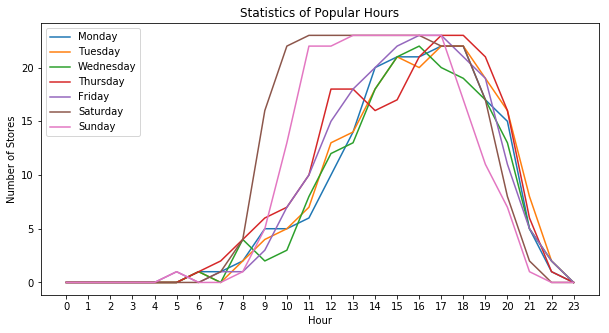

In [61]:
df_ph.T.plot(kind='line',figsize=(10, 5),xticks=np.arange(24))
plt.title('Statistics of Popular Hours')
plt.ylabel('Number of Stores')
plt.xlabel('Hour')
plt.show()

__We have a general idea about which time is perferred for grocery shopping, and now it is necessary to summarize the store information in each region. To achieve this, we use the K-means algorithm__

In [62]:
from sklearn.cluster import KMeans

In [63]:
k_means=KMeans(n_clusters=4)

In [73]:
X=np.column_stack((df2.lat,df2.lng))

In [75]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [76]:
k_means_labels = k_means.labels_

In [78]:
k_means_cluster_centers = k_means.cluster_centers_

And we can further visualize the stores in each region on the map

In [81]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=11)
for i in range(30):
    lat=X[i][0]
    lng=X[i][1]
    if k_means_labels[i]==0:
        c1='green'
    elif k_means_labels[i]==1:
        c1='yellow'
    elif k_means_labels[i]==2:
        c1='red'
    else:
        c1='black'
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color=c1,
        fill = True,
        fill_color=c1,
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map

__Finally, let's list the stores in each region__

In [82]:
df2.insert(0, 'C_label', k_means_labels)

In [96]:
df3=df2.loc[df2['C_label']==0]
df3[['name','address']]

,name,address
3,Adrian's No Frills,"1925 Dundas St E, West Argyle Mall"
4,Brent & Jennie's No Frills,960 Hamilton Rd
7,FreshCo,1298 Trafalgar St.
10,Darryll & Tracy's No Frills,1275 Highbury Ave
11,Real Canadian Superstore,825 Oxford St E
18,Metro,155 Clarke Rd


In [97]:
df3=df2.loc[df2['C_label']==1]
df3[['name','address']]

,name,address
0,Metro,1030 Adelaide St N
1,Loblaws,1740 Richmond St N
6,Robert & Tracey's No Frills,599 Fanshawe Park Rd W
8,Sobeys North London,1595 Adelaide St N
20,Metro,301 Oxford St W
23,Farm Boy,109 Fanshawe Park Rd E
26,United Supermarket,1062 Adelaide St. N.


In [98]:
df3=df2.loc[df2['C_label']==2]
df3[['name','address']]

,name,address
2,Farm Boy,1415 Beaverbrook Ave
9,Metro,1244 Commissioners Rd W
13,Real Canadian Superstore,1205 Oxford St
15,Walmart Grocery Pickup,1280 Fanshawe Park Rd W
17,Remark Fresh Markets,1180 Oxford St. W
19,Masse's No Frills,925 Southdale Rd W
22,Loblaws,3040 Wonderland Rd S
25,FreshCo,981 Wonderland Rd. S.
27,Sobeys,661 Wonderland Rd N
28,Food Land Supermarket 豐盛超市,530 Oxford Street West


In [99]:
df3=df2.loc[df2['C_label']==3]
df3[['name','address']]

,name,address
5,Cayle’s No Frills,635 Southdale Rd E
12,Gary's No Frills,7 Baseline Rd E
14,Farm Boy,1045 Wellington Rd
16,John's valu-mart,179 Wortley Rd
21,FreshCo Commissioners & Wellington,645 Commissioners Rd E
24,Bulk Barn,1070 Wellington Rd.
29,National Grocers,1055 Hargrieve Street
